In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.2


## Introduction to tensors

### Creating Tensors

PyTorch tensors are created using `torch.Tensor()`

Docs for this:

https://pytorch.org/docs/stable/generated/torch.tensor.html

In [2]:
from IPython.display import Image, display


## Image of a Tensor

*from* https://www.avni.sh/posts/linear-algebra/tensors/tensors-cover.png

**In the picture we can see**
1. A row or column vector (with a dimension=1),
2. A 3x3 matrix (with a dimension=2)
3. A matrix of matrices (dimension=3)

**Note** <u>Even a zero dimension object can be a tensor</u>

*from the website*:
> "In linear algebra, a tensor is an array of data expanding in multiple (or zero) independent dimensions. It is used to represent quantities/equations/functions with multiple components, for example, the equation

> $3x+2y=0$ could be represented with the tensor

> $[3,2,0]$ where each value in the tensor represents the different components of the equation.

> The number of independent dimensions of a tensor is called its rank.

> Vectors and matrices could be generalized with the term tensor. The following Venn diagram visualizes the connection between them.
"

In [3]:
image_url = "https://www.avni.sh/posts/linear-algebra/tensors/tensors-cover.png"
display(Image(url=image_url, width=800))

`torch.tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) → Tensor`

In [4]:
scaler = torch.tensor(7)
print(scaler)
scaler.dtype

tensor(7)


torch.int64

**As per above we have a 0-dim tensor**

In [5]:
scaler.ndim

0

In [6]:
# Get tensor back as Python int
scaler.item()

7

In [7]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

**Vector Image**


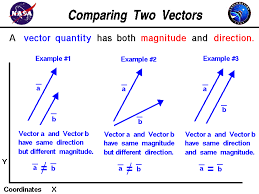

In [8]:
image_url = image_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQMAAADCCAMAAAB6zFdcAAACRlBMVEX///8AAAAAAP/8/PzBwcG3t7ff39//AAD4+P/8/P/p6f/19f/s7P/09P/x8f+MjP+IiP/i4v/Ly//Dw/+Pj/9SUv+8vP+Cgv+YmP+xsf+cnP90dP+Li/9CQv8qD16Skv9paf+pqf+kpP/Nzf+urv9+fv/AwP/z8/Nvb/9YWP+2tv/f3//a2v9MTP/U1P85Of8qKv94eP9iYv//399kZP8nJ/9ERP88PP9NTf9jY2NXV/+Dg4MVFf9kZGRSUlKYmJioqKiGhobS0tI+Pj7/7u4jAFoAAE9GRkYxMTFxcXH/w8P/sLASEhIkJCTY2Nj/Ozv/l5f/YGD/ISH/cXH/jo7/goI0HWXJAADDv8n/19f/Rkb/bm7/Kyv/UVH/lJSemK5YS3tDM2v++evBpKhjVlphPmBYSlwtBgCGd6TPZVQ2CySiq5gwGyNGVj9sQEtMPXV6U1BGOmRKTo1UZZ1CR5drg5iHdoe5xqhWZpEsUMQdRMIAOMwAV+Uqcd9XdswfOmBGLjSnnb7XwMDKOC7Zkop6aWhjVXsAJrNBkfMAbfkOeuI/Zn6NgqaRED3PbWkkLHBoh4VyEktIM0kAABYQDnIto+oOdPMQMD4IG54dWe6Gs+Y2WqEUDivKFhiwACVfAE0pKUQZEKNCXLtniM1mu9mMWXdYJiUSAHgkO5BLFwCVLzekn9e8YWtvADVUyvkREAAyUlUyGkgVKMwXlu2o8vi2NkBi4Pp1jNqyeIiLABHx8bL/9JFGobwALdIhMJycDzZKD1cAAEGyykMCAAAgAElEQVR4nO19iX8bx5Xm6wIJoXE2GkcDDUIAGvfZAEQABNEEwQM8LFK2ZIumD0WU7c0om8xq1sl4bMvKjLKJPUrkeGzLHs/sOvFkNjOzu7PRrrObnT28O/nP9lWDJBokTgKUfPD78UB3V7+u+urVq/eqqgsAZ+iGePxSPP64M3EqiMf1w5Qsfn3v/FpzrXnjvv7wlO408/XI8NLLr/wLZvPbf/DKywMSXm8idnaaN280127uU/adr4VSvPwvme9Of6+x9IfTzL+a7pNOf6t5/nxz58atG3s7+KG5S0/+/DuPKJenCfaPNhbr//rV7//g+z/4Y2aaea1nQv0OUnDrxq2dHWSAYm0XdN959sIjzOspQfe9P1m49fobb97+q7fu3fnhn9b+bKVXyr3m+Z27ezfv7jWbt1QWmg9+9G+e/fGjzOwp4ScbK2+/+s6bb97+87fu3PvpT3/2SmOxe8LrzfPN+zdu3Vy7f7/ZbCnCu88++/NHm9vJw4C2YH339fdu337zjTfeunPn448/vvcX15nlbmnj1Bbcv9XcOd+8cVfl4P1PP/3qU0DxwYefvfcAteD2W/fufXzno4/v/fQvF7/dLeF1ysGt+7T0zfN3d5rv/+LZT5999+aQj4k3hus9uvfP8Rb63BIfo4fe3fzuqw8++eT2W2+98Vcf3/lr9s/v3fm33/13+i4p36bdYhM1ABtC8/zLnz776S8+/WXz/HBFW2AYpjZMwi2m29k6o6LrHTpmGyk4cnF6aqhstfAa89mrD/7mV7964/Ybv/rbex//+3sff/xDhuliEXQ7Tathx3j3xl3Y/eUvnruw+uv3f756t7nWja5jWGfqNYa5NETKxc1uZzdrGyihu53SMUwcppnOQjMbw2RrH3/38O0Hv2/+/T+8+rfX/8N//E93sDnce+NnzE+OJ4w316ywe+m9+9gffvqPsHvzH/+zBaxra7tDPGSawZI1MJv6pSoWZGppuroYr9Xi0FicrjewGI3Nmp6erseXpuK16aU6Mqvf3NTXDmlbwHqOIwuNmu5SbRmmqrVDR2YTOdjGMjeWlvRUeHUKlpitKVje3GzQs9ML+x97gdl6/aOPfvPRH3/IrC//5IMfYnu499brD/8ADOxRDtbWjFaAT3/+0gW4v7Z74Tv6PaMF9obigGGwseriMEUVugG1lmYzS7BN/02hmuAHPL3F6JnFZXpuhWo3Hh+2tCoVgacxXZVpSTjQwE1Gp0dZCyhkvfUIem9juiW7vsJsLDMbW0zv1sE83Hvni9u//c3vfvaH/+XSf73z1lt33rr9s4d/dzwh21xbxU7gl/fhLujPv4uaYN7dhd3fd+1DjtB3oJkbW3E9fsZMLjDTOqYOzLZ+illYRl62GTzd0C0y+hoeYWFqzNQUs607FFGnma1P0QLW4symrnHYYDcZSsMlPN5AIVt4sLyMXRtTjy+j/lEeqtug78vB5oPPKxX5t//tL5ilm2ga37z9xusPV7rowbu/2L1xf/fG3bu7d3f/+693757fvbW3e3dnCHuwjLVEQbOpFnaB6m+caegZVGimimq/TXNbRXPAxGtY48gBJlLPtKCjh1is6gp6snFkClk5sLFLSMsims3qpqpHoJuiLUe1EMgDfeYGwyz0yecfMa/8yXuf52//9W9/92fr/+PNN5GDH3zWxV9e/fFrzRbWbv7T/1T/3791a29tZ4guiVYHNuapGqp2nCp7A6obNJMNrC6ssiVmpdY6TW0Z1riOWbyER3Hm0EA26EWgKs7Ut1WLN31oYpcZKhiNZr1aXWq1njpDf2jl00eArt6rU1Fxndn6X//7pZcuffHFR/+n/it0E26/8/rDrnqzu0Ydg/M3zr/7T2bqI+zd3du537w+mALM5FYcq2ZqCeWqKk4VFQuhb6i2II51jIRQ/VVb/BI26ukpLH+tnY+G+hGr8xLVbSqvbSuwfdRpXaNpvUTZ2FqgSlRFXanSR2CnsaXDx/TO3yp2hLqX7n+R9d/+HXrM77zzzv999eHW0Yag4kbz1t75nX/+f/9MvUV0Fm/u3Wo2h+oaV6h5q2JbYKpq7lDZa7SiUEfrzGacWaliM6fmHWsfy48tYhlUq3lo+zfUIjCUqW3aYrbX29em1F53gVnfZtC6bKyoN09RZlSrSwlcr6ptqRfqzIfVD9c+/+IL+Tev/v07n3zy4PufdXMPgCpC88be++/S8u/s3Nrbu3t+b2cYNcB2sM5sNYBmZgstw2JVN1VdhsUlWFlZwhrAItUXF+KNahz01alL9BLageXNpc123S2pRcBUlxaooE1mvR3jxxeoudGvMCt60FVprwhU4xaZDSxHjd64RCu6X/6YrQ/Wf//gnc8//+gHDx78zYPX//Lh93okvb7WfPf98zeaN2jQeGOPtoehKOgF/b6t7IbGEui21scSPwKmmYcrr3/2+08+v/MPzQc7r2NP+qNeSV/DdnDz/D6ab6/dGm8U7RLTe8BmE1tP99jtVLDIbD389ts33vvhjR98/4MP+1Dwox+jJpw/5GDt5pgDidO13sFGfHGp9ugooHabee3DD769Xt9+2GA+62nldEiO/ubaQRe5N4yH+NXB6vVXmK1F5pXXmO81BqXV7958+9bbN68P1SF8ZWCgf3YbP3nl1y8PE9l98zB1BmDOALozPO6meIYznOEMX1bo673de4NjGAmYKp0Ac1h7bqpxPN1SO1JYjsPmQJf08io80TbfTz3RM6GmBJjqySNXn7sAV5/r/6T6eo+JSISZ9L/3MJUlDHxWe67RZeql3h7HWlmGrYEcIAHn2hw8fbFnwvY4NU11lCs89dxq3wfpmPh2+0gxglOChBwASFb8ME9EcMoJsJJKSr3OyfN5ECIQjEHUlbcASZRS4CJSOgt54pjlwbTPWmOlXtXB4jqWdHNlo1WSan2Fjq9ubGJgvwEbCxuNVtpnLr949ckrq3Dx+XMX4Ilzl8+tPvEk/oEXV586dxnOge4crF558vmLcPHFy/uFia+v1GBqpbpFh9SqBxy0Up2Dp66dgyeev/YcPHfuykX81b3wBDz1JN577ukr3bRpehM22vGEIAIx25xQdEeCIKatBLxJEJwmkjPRy7kSRAgUQnidDUACE7OYBPUglwd+HjIEIol9DhagtghL0NjUMzDdekC1BgvT01WoLcH6MmwvH9Tf1acw389chWfgIhZ59QJy8Dw8dRWQEdQDlYNrF+HFixeuwBPXWuKX6c1T67C4hHWoP+BATUU5eH5Vd063eg4lrD4DVy/C5SeeeBKeehov4cnjqC9O1dp6m8kb8zCXLea5Aq14o1pgPmvYr11JoAWOhmDWDYIsS0AALxlVDhwugAqv8Psc1GBxEeu8vglLzEIrj9gWpmu1BiyvqxzoDzlQ8/0MPPXitadpHpGDy3DxaZWD1RYH+P/qxYtXLl/bL4K+uo4cVCnFG+22oKaisr6FGnD58rkLauqnKQd4CinszkGcmZqe1gzO5mc9UIyBwcqJYLdg6QIBSAUPOHAXaV37IlB2iEXwdXIwD5AmedBwMLWNmYwvwnRrMqY+jeeQmemFrhw8dwUuvrDPwbUDDnStfF+5AJcvUiXYXx1DR6FbHMS32hyoqVp80uJfoMKea3GA4lC5unOgToautI0VqjrYiUdJGYhAjGbiMJTwv/XANuYLJQWVhSu5cySqFJEDE20LjowCYZIDmPcccID1vxRnatvbOmZppWV163TGIL5dY/RQrwJz6SDvT9O28K2rq+euXrkCzzx/TW0LF19QOfgWXL18FVv3uafPXYRrL1y+3BJfW68zU1N1+pjNev2Ag1YqtV3B1WtPP0k16wX8BNewt7h67rkWB888dVQP6O36tl01penfDLZ+S9qKjcGIBwCsff8ym04jHRar2QTGNNgBU6dpKpqApif2tlz6owc9/tEfnFMfRI2DDi/o6A/F6ipWL/5ZvYBVdxGb8qpuVT2po6fwGv5ZvYAn4MLhIil9a+UCzb4+rj/oPdRUqixQb1Vv0F3QqffqqCjd/tWxYOzXXSq+ccXrXnj+yWfGFXKGM5zhDGc4wxnOcIYznOEMpw7WnqaR4BGkH0NO+sOaTmeOLTYzGSci205EZ+7YWbL/OI/HaFeOUzQQDkmUjp3MHQxJGwxg7bp4rg88FY/t2D0O//6HqGCUy4YRRR7CjkGy1QWyZdZlSgiuSDY8LySBAF9OAThLJb9ATsBBUsxkjp0McK3/lkJQCMojSvUEALwheyGdjVqLvuhM0VFIBsIu8JTNAFlFka3ZEyuFnRSz4CUOcEeT+ZxPjHDEwoWIleSICSAYRJ04AQdFT87sk6Kis5j0kjl5ljhL+RkpYKzIGTAq+awE8nHl6wuxlOSgWLHYeWWGYJ78MzKUpKRD5mWAzIwE0uHAzsigegBCWeSTYjBvTLhD+ATRQ4zEK7CQL5VCJ+MgGsqBPAsZJ7EFLZhnmwd/Rd+sIIAlUPCayKjDMB46fJcv2xPirFNBPa3Y5kD2JFNyRAJeKZWjFoEbPZ8tGMl8NlQC4s4HXHljIRYJEJ/CEgj5gyyEbZGT6UEyxbL8fN5O0siBGTlwFo1KICAmUm5wKHmxHIIRDYKUd2VFLpyIuqJBGTlwBWTXbK4IwQpmMWozZfJ58+j57IWhJp0GIFTwRUMZPiWKoidkEaAQ8PnCDjcrCthoJQmEaOK4vRgNjrnR0sc3R3ij1z2a7OEwY5u0xM6Jz8HQM497MR47al84cTx+Dh4/zjg444BiVA5G9F++EhiNA7YcPY1MeC0TFugYyTEciQO+RE7scfXBLDlxTNMdhdGc41E4SBByChzkUOpEObArRMNBWBx4w/AcGEvkNDiQyIQ5SFGBhxxIZJIcpJOnwYGfTJgDNZcHHNizZKIcADhPgQN7csIcGBNtDtz042Q5IF4PEU6cuR4wkdKE7QEVqHKgNrPJciDRcaWh1myOgkIWOGKaoMCAggrb0oNwfsIcsMQ7Rs56wUoXMZknGDYZSAzAsi8wN2EOQpMYPTiGaGXCAkVFc5CctSYDA28ZmgMzOQ032UzGHTA5CqJprTky1GDq0BwkXCfJ0SDIk7axyVnNQTY41D3DcmCceIVR8CcZkeyHtLbm00O6zMNy4CufJEuDIBcmLLCY1BwMYQ5VDMmB/VTUwEEmHDBmtDU/tBHvwwFrpmjlcjbZK9U4yE/aGswXNQfk+Jxed/ThwOyLRqOFCP0Ym5wnx3sREbX/jkxEalgVqNoVB9FMJKSG7suHawulyVVYLuZwOGIqByQyCYEZVaDqaRKtLzC89L4cGPeNwATVQAPPpJ0ur1agWBra+ezHgSGZaIWJpUlOgxg9rbc8WJKajECrJ9b6oGj6AesILl1fPYgWVU+Wn+wYR5io6zikSamBI0zUiSW3VqAgDy+gHwdiMkTfSmHJROfYuIKsZnliUqWiSxWl7QdG8sH7ccCGchG0NU6lZ4qTgHgUmuVicWDKIaFwFVr6qLbmRwrFBvcLajCqwbhxrslsNVOn68TrIo7CYLSgQAvh26esZJRp18EciJ3tVgqNIL03Jh6C2fKag9F88IEcsNpgFEyJyYykDBvODA2Lth8Y0QcfyIHg1xzEFDIZDoqTVgNBqwb50WbDBnHQEYwG6BjlJDjocGongZxWr8IjRuSDONAGo04yKQ6UmQkI0aJjtCQ/4gTAAA4yHaNRdv9kOPBO2kvuGItJjRqRD+BgvrMXJ76JcKAMHuccDRXNer7Rx7/7cxDrbFkRgh3D+MFejAzwMSLeiJ0dYZ1STmteRvfB+3PQEYyi5zER99YwUIw6XUacQ0vUeskn8Oz7chDppHSUOKQPOrqxrjCpHAytBx1e3AlCsb4cKB2DkuaRHNCeMJHB83W+oeaHDkA0rqvxBNMg/Tg4Mhrl8/dINxqcpUEpcjJSMLzOdYydBk/gfPXjoHNQkp/MILBBG9t0Q1gmgik7gs5p+4EThWJ9OCh0VsWE5gIK/SvKgQwg17nh43WnNptBdamy3+VyzQWHltCbA2tnhU1oSijT10sOV0i09Zihh0A6RksOp0FGCvB7c8AdUYPJrECZD/a+hnagMHJ7K2h3ZUruu3TOkTLbkwNLp4Gd0CBwrrca8DLhRlc1I9G8ZJY66E/FYHIEL6EnB0d68cnMBUDPVrpvB0ZGxzyocuBWeWbZ4d2Lnhwcmbqf0CBwpseCAOwLoicyNx3ugPuw3B4ORljf04uDcqLzUZOZcu0+BZjLk+gJ+92OCTDlYF8iECujxM89ODjSCxQnM+XaVZuwFdhO6nl0TIA5RlD/DvTgoNLxcpna/5gLgiBEx5ob6qIGyAB3ct+rpKlt04kjuu4chDvNd4VqnHYq/mSIHFMDagfGkOjQqoFtoA/eC905kDsGJfmTKtkRkCPD8uE8esXjCCxpwmvDEKFYD3Tl4MiUwoGtCYxnGANyB5WOPHFawOzged5xsndxO9YvBE6sBt056KywQ43LxsZ56b1z7gcZ4KgO2EORSCR0InI7xmIGhmJ90I2DTvNtOozLkknX8EH9MRQ03gyPveHY63M92rhqnPGdLhwcGZRsP2ouZzm5q6RZEIAMaPoCbvgxsw50zIP2D8UGoAsHjqC23bJtJcv6nImjiYeG76CiYmgHtDoQSARPZM0C2vqYH2cWe/BcW1uFHeHQiRdjsKGW3TuwA20EZq0n0q6QZrRkyEW5PTDSXNvYoHbgKI0BJ4y9zsUfHOfuUebaxgUy0MUrduZL4w5NmH1jVdQADsKTU4NYiThPY3nb+BjAwQRfSj9qB748eHTvO094hfoEcfbO9xkHFGccaDmg5m8YE6gmMUC3MfzHvqvHydDmgE7tKPs+fbpPj017Swt6NYn9QSG2PXHUZaIrZhjqeyyM9ME5c7dtZ4ydk6i8FdghBozUfWEydjUDR2A9Oo2naQsVs7kCIR9Yo5JAeGPQyxY8LDgS6hPNiQAbFZ0Q8KgeA+eGEsSCZoNnJkRCJkGEGTENSsB3tP8rRiAU3P+s9A6RvTSN5IPMQYDmOwzfvZ2hgBCA2IH7PtebXZ5OELuz7V3BA4frzvmjIaaGg0g06vUm3dEy7w6VgZhdKRJi6RJrWug0LweImaQqVvUwU0r57CTnt3nCMQJZR8Cj2MyguMWjq+KMfshbUhUOgjJHZENSDjvLTjD7/epQRNEVsSVlr7s0r05mEhAcuXISnHK0VLIm5JADD9xyVhupsQSKab6SwCBMUPKm2bwjlC2AoexX1aUw75FcFTGsJFX/tsRKIbvLBSE5IStGQbZl5DLgxY5vDOmwibIMgitAh0z4OcyPc4ZyWPaqhRYTBSfd2EuAlufoKptTJY80r37xBrE4goqRNpPwsVe/KqEyBuOyJwEW2c6JLJmhUWMkGaQX3QHCSSmBGCR1DLcgEVA8QWcejELKkUS9KlohNQ+KduwmSffuCrkCLrAWwxLmx0kn6LxB9ckOkdi48Kxsj6ktNCASKHNRLIjR48lUQPb4zRCWwd/RHLQcJBJgrsheRynvJg6pVFHjOWJTB+qC/tkkFtZMgi0OIqi05XLUni+5iYfPy0ZqC8j88XmIFHFj+M155yGXt3tsVoVDO+IRArRu06Uw4bxeQTGrh2AnHORDYkwBR9Sb84Mi4ulUBTocdp5IQNwBtwzh+XAqCIRquTcYonVrpjuQefiiK+dVJ6BNJAjJgISq6nB6jCUoSZgqrECpI5un3zdW8KnZAOvx85IfOJddQvvCz4VoxVtdoaTgcEjhstAaoAoawV6MWlJlifebRb8jHMC0BZenQ2DWABkXx0rllNtvCPgzKTQdmWyIjnoYiigwlZtJl/e3iRMyYEwkzLzfk/PbQ2VvGttqJlHsfDXpzD8444CizYF52MVM4XRHSn7SG/s8crQ5cA+7mikval7xIpDouwJo5mRjnVImve908kccInHIBUdGj9TuTaxGY5+R2zYHsfx8wiwnRc5YdlTUNdV8uZTh5sVQ0h+dnzXNllXrnC2WPELENRPwp6zFMke4oj0sF1ni675RI8mYgTWCGUNntpXAYDSA2QpmA/5iVlt5NJjVAxYMVosJD0JpkjOxBhNYRaFziwiZOopGsLIWlm3dzKJAK95/KIPCnMuH7FYDmOh3yoA4a/TQ/wZDt+0mNBxkTXSPTB+RCiRVovnNi6KFl4gtmpNZ4gyKBZUXyNuCUtRB3AoXYi0ESnbCih5i8HddSabMklyRCxJD1lNO0sFwsyzk08UsTwokofAJn6p9pKjMViSOq7AkSjjiqwQlJDcm2rh5OSAWyxrvc24+7/bZksSecFZm6cIQi+wkxnmXgwSVoOy1BbO0lDGlWHZlCBHnXBkuKbvkSB6UYNBNEl1edNJwkLQSTix4XEqOONR5wJwj6aQdbiA8ZyBi0Eu1MieDMjMrBeyEdzpFq13lwGpD50buygGxJmJuH7HNEG4uQUnMlNEN9vlteKMxymGRqT9PLEGH5Mz4iOCDii1hUhJhxTTrkNC5Cc2QgnaXWX/GFuJRoI3Y/IV5PGEs+0QQ5qIE5nMeFFiijSWfNlaSGQKuZJFDL8cr2CveAihcwdxlwVubgzBnSbqzEoddKF9WNywOuBJsUXJFI5moIctGk6pj4QsGQzbskqVsyFBwZQqCz57JCiCDr2s0QIxBjmSIlUipopvO3WREXkGVQg6wKkNKuECfRMxY6Rzy7SA5MlM0k1mehPHRgYrD5fS7ZzQ+kpzjOGInRsKF/Q4athkDGSJwTiQzG3Z68rxAB6y4GY/syhFTIBpxlHguUAznjSSnhIL2LuP4p903SqZYOsSL5ogV/Vg1hPN4rHZPOCRCyOpIWwO5Viq3PReOpbwZKVVyxwyhmD0s2j2xMP7y4NGGRl4zn0vFpLTbCOGA2kYkj9FMBbIpYzjHBtQpIdYT86bM+MBUiGUDYZOHj0AmYE3HLF1eSfuy+QfJymnsStcfXzYOHgfaHFg6ZhLYNPZfGYN9mO7d0O6yv3w70g+B4z5SVG19BuKMuWVH50LNTPeZzUwyduCBHLM4of0h9ZYz6eAlcETSnTHQwYZOGV5sj/kY2Ezn67XHIQ09X2GR4CCt2GWaR9M3+pOBjGBwKSUTmLJREonk81mSEstGoRBzzrFJIelTX9ePRec8wQKbnDeEy1FxVnCFnUGCcWAF5gUCM9kO33k/7N03xwWPE7uDSqddOhjASyVm2hlMhHKDXksafgrMYnMcjJp0W3Wt4UDdqd1Eosg/JxqJkPJydn9GCftdEpd0J4g96VQlhVxG7NjAHSzIdvSn7EUu6xbseSASZyIhl3teK7+E3gyxBxW6tKXozzsVicwq2ZicjZFSqDIrKeWyorot+In2ecRdqUCwMpeXAz6TXEpx+Xzne4B8xZ8j6HPhL22nkSzhE8GEqPjLyZK1onoSMTKfDxJr3h/jSXZOdpGQ4iQhuh09vclfObq2TusnguzBrtmHHBRCVuQgImQqjpJXymZEVyhG2PmZFgfRNBbYmwgIijVSIIakLesV0jIQjwcIpvTaNf4oMYeTeWOBrhZCXYhStwDKdmJLci6WiBVOsGfnVMeCQCqKHAD6hxySIqRSUU4CYpMcsx0ZNgXyVAgngMpB0Oe0hDl0mTJlPJnk6LCEI8liCoNUxCfn5v12YUbJFQ14asYGxFnxHH0Xpc2Bwz8XtCoJOYJtwawkSjNu70w6iy5dJJkzBCu8YphNlah+erk0Ps8tO5O8XCyUTMFAMq248z7ClnyEptSuCSFu0alkZDosZyJWWeVAzlQiooQy0HkRMmW/aoDksKByUA6JPDFKUclbSAUz+RnJHQxpG37ZW6RCUn6z2hZS4aITb5uZyflZEpl1q43VRffzDySkpM8rJeV0gSP8HCYnqTn8zfOSt9PSj9U3hjyuQY3WKfnYVFQK2zCh2ye5OfCBx24VpJwIRl+KTxlFR5AmzPiklGCOgpUT2VzCkfGhVxkqWN18xtuxhDFWiHkEiBo8HtUhdBc84ExxnphdhAKqqDrgKxkwRbqA/qUQyIpmr3sGfLxHjLJOUTC4E3ZbpyUZzz/gv+R9IRqXId4J+pr7SEPNfH3NORgK32wO1qeQgG84B8DQr1f+hnOwuL45ZFv4is6pDwNGNyQH2cFJRoflS9Gv0m8I7/lOF8VB36qGi96Ez+cLTm47G8dkNhkaE+q3nPfgICIh9lepe1vRtMFgsVjGahYZzul0zuwzW6BunkF9LffkXyGlCuxYhVChAkdbVj14fyQWiq0lOpmxX/03pe12+8F3Ac73TzsUDKrAcffY6cmB0dV6rctFt2NQIy1xchtJmhy8x8mrodCI3yfVA6z6OoxKxuzICyF7cmB2VNThnpzDF3KoGiDJ+bG/0X7Opep9Rt3oohUzG8d6QyiYVPXerApUGwXJjLoLRE8OnEJBNQcmw7zJqgZuUhTG3trJzbUGlFirb7/HJZwyThvjA60XWln2YBMZUpBHfMmvJwdcJaoy3G4LUtY07iL7jJJTObCmCgG3V1VaAqngyQWaiV3Nk8GbSqW8akhMDMcXBPXHQJtoL/K5nKquDnF23H1xDL5UQo3wNW1BKo8hlRW86lfcaduCrTjspsL7GOwjnYqDZD98OSyVmfA34cUyk90jCsFP5qX/I7BNeOvAsTCQg+CpvHdxKsp1UjyeuNE+aP7kkeIbHjurOOPgjAOKMw7OOKA44+CMAwo9803BUk8O4tPfFFx6hJp1hq8c4lO6zmP9sq5HUoRuGeDSCN8O/5XA9PY001GmRm3lgIONLt0Fo48zXzcOmGWY1jdWlgB/4yv1qZXq0rp+Y7Ouq9enmBXd5np8ur6iKTSm+doZFjrXFmeg3lB/9Ux8cQn/AhOf3sSyLy00aszUorZxrK/3aSpfTdSXYKOxdcABHHLQqDaqG/HFhcbU8jLqyiE2G8srjy+3p4P45voSTK+ov/F1mFrZbGZTRK4AAAAhSURBVKzoV2BjaqWBrUK3Wb9Urdc0ybeRtjOv8gxfM/x/yPFMJoxcyNUAAAAASUVORK5CYII="
display(Image(url=image_url, width=300))


In [9]:
vector.ndim

1

**Matrix**

In [10]:
matrix = torch.tensor([[7, 8],
                       [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
matrix.ndim


2

In [12]:
matrix[0]

tensor([7, 8])

In [13]:
matrix[1]

tensor([ 9, 10])

In [14]:
# Select the 8 in the first row
matrix[0][1]

tensor(8)

In [15]:
matrix.shape

torch.Size([2, 2])

In [16]:
# Tensor
tnsr = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
tnsr

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [17]:
tnsr.ndim

3

*the tensor is 3-D*

we can also notice that the number of preceeding and antecedant brackets=3 (That's how I remeber it b/c it gets confusing)

In [18]:
tnsr.shape

torch.Size([1, 3, 3])

**This is saying we have one 3x3 matrix**

In [19]:
other_tnsr = torch.tensor([[[1, 2, 3]]])
other_tnsr

tensor([[[1, 2, 3]]])

In [20]:
other_tnsr.shape

torch.Size([1, 1, 3])

### Random Tensors

Random tensors are important b/c many neural networks learn by starting with tensors full of random numbers and then adjust those random numbers as the data is being processed.

The process is essentially this:

`Start with random nums -> look at data -> update random nums -> look at data -> update random numbers -> rinse and repeat`

*These numbers we're talking about are weights and biases and as processing goes along, those numbers get much less random*

in the docs:
https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html#random-tensors-and-seeding

In [21]:
# Random Tensors
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.6919, 0.4350, 0.7207, 0.1757],
        [0.5414, 0.5618, 0.6002, 0.5656],
        [0.1658, 0.9707, 0.2973, 0.4963]])

In [22]:
random_tensor.ndim

2

In [23]:
another_rnd_tnsr = torch.rand(4,5)
another_rnd_tnsr

tensor([[0.2120, 0.2345, 0.6131, 0.1536, 0.0487],
        [0.5050, 0.0850, 0.7310, 0.3876, 0.3385],
        [0.9423, 0.8400, 0.4756, 0.8216, 0.3820],
        [0.3245, 0.6862, 0.7731, 0.3143, 0.7605]])

In [24]:
another_rnd_tnsr.ndim

2

In [25]:
yet_another_rnd_tnsr = torch.rand(3, 4, 5)
yet_another_rnd_tnsr

tensor([[[0.6165, 0.6126, 0.5328, 0.6866, 0.2824],
         [0.7691, 0.8622, 0.9961, 0.2622, 0.8505],
         [0.0264, 0.5324, 0.4826, 0.0894, 0.6054],
         [0.5855, 0.6932, 0.7033, 0.5175, 0.6063]],

        [[0.7942, 0.0083, 0.9003, 0.8623, 0.6885],
         [0.0288, 0.2319, 0.1181, 0.7179, 0.5081],
         [0.5101, 0.1936, 0.4623, 0.9535, 0.4263],
         [0.7762, 0.7571, 0.7469, 0.1111, 0.6392]],

        [[0.9899, 0.3443, 0.9447, 0.1821, 0.0564],
         [0.2422, 0.9762, 0.6097, 0.1381, 0.6358],
         [0.4358, 0.9621, 0.4825, 0.6939, 0.9724],
         [0.8032, 0.7786, 0.3167, 0.1255, 0.9057]]])

In [26]:
yet_another_rnd_tnsr.ndim

3

In [27]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels (R,G,B)
random_image_size_tensor

tensor([[[0.8359, 0.5016, 0.3492],
         [0.3330, 0.6550, 0.4688],
         [0.6025, 0.8732, 0.3648],
         ...,
         [0.8090, 0.0802, 0.8271],
         [0.9334, 0.3962, 0.7512],
         [0.3897, 0.6298, 0.3198]],

        [[0.9279, 0.8044, 0.0625],
         [0.8779, 0.4920, 0.7024],
         [0.1506, 0.9016, 0.0951],
         ...,
         [0.0470, 0.5213, 0.4401],
         [0.0613, 0.8809, 0.9445],
         [0.7502, 0.8124, 0.6537]],

        [[0.2905, 0.9660, 0.0710],
         [0.3401, 0.7271, 0.0188],
         [0.7475, 0.4612, 0.6615],
         ...,
         [0.2828, 0.4001, 0.5365],
         [0.4557, 0.6197, 0.4094],
         [0.6973, 0.9119, 0.6916]],

        ...,

        [[0.2437, 0.1600, 0.6540],
         [0.5152, 0.1869, 0.1546],
         [0.8592, 0.9185, 0.8702],
         ...,
         [0.5179, 0.8692, 0.4506],
         [0.3961, 0.8053, 0.9100],
         [0.7637, 0.0074, 0.1079]],

        [[0.0949, 0.2150, 0.0769],
         [0.6065, 0.2882, 0.1822],
         [0.

In [28]:
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [29]:
second = torch.rand(size=(3, 3))
second

tensor([[0.8471, 0.4309, 0.4317],
        [0.6434, 0.3554, 0.9340],
        [0.0543, 0.4581, 0.0744]])

In [30]:
second.shape, second.ndim

(torch.Size([3, 3]), 2)

### Manipulating Tensors

**Tensor operations:**
1. Addtion
2. Subtraction
3. Multiplication (element-wise)
4. Division
5. Matrix multiplication



Addition

In [31]:
torch.add(tensor, 10)

NameError: name 'tensor' is not defined

In [32]:
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

Multiplication

In [33]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [34]:
tensor * 10

tensor([10, 20, 30])

subtract

In [35]:
tensor - 10

tensor([-9, -8, -7])

# Matrix Multiplication

Matrix multiplication is a binary operation that takes a pair of matrices and produces another matrix. Let's consider two matrices:

$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\quad \text{and} \quad
B = \begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}.
$$

### Dimensions Rule

Matrix $A$ has dimensions $2 \times 2$, and matrix $B$ also has dimensions $2 \times 2$. For matrix multiplication, the number of columns in $A$ must equal the number of rows in $B$. The result will be a new matrix $C$ with dimensions $2 \times 2$.

### Element-wise Calculation

The elements of the resulting matrix $C$ are calculated as follows:

$$
C = A \cdot B = \begin{bmatrix}
c_{11} & c_{12} \\
c_{21} & c_{22}
\end{bmatrix},
$$

where:

- $c_{11} = a_{11}b_{11} + a_{12}b_{21}$
- $c_{12} = a_{11}b_{12} + a_{12}b_{22}$
- $c_{21} = a_{21}b_{11} + a_{22}b_{21}$
- $c_{22} = a_{21}b_{12} + a_{22}b_{22}$

### Example

Suppose:

$$
A = \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\quad \text{and} \quad
B = \begin{bmatrix}
5 & 6 \\
7 & 8
\end{bmatrix}.
$$

Then:

$$
C = A \cdot B = \begin{bmatrix}
1 \cdot 5 + 2 \cdot 7 & 1 \cdot 6 + 2 \cdot 8 \\
3 \cdot 5 + 4 \cdot 7 & 3 \cdot 6 + 4 \cdot 8
\end{bmatrix}
= \begin{bmatrix}
19 & 22 \\
43 & 50
\end{bmatrix}.
$$

Matrix multiplication is a fundamental operation in linear algebra and forms the basis for many applications, including transformations in computer graphics, solving systems of linear equations, and machine learning algorithms.


# Is Matrix Multiplication the Same as the Dot Product?

Matrix multiplication and the dot product are related concepts in linear algebra, but they are **not the same thing**. Here's a breakdown of their differences and relationships:

---

### 1. **Dot Product** (Scalar Product)
- **Definition**: The dot product is an operation on two vectors that results in a **scalar** (a single number). It measures the magnitude of the projection of one vector onto another.
  
  For two vectors $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^n$:
  $$
  \mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^n u_i v_i
  $$

  Example:
  $$
  \mathbf{u} = [1, 2, 3], \quad \mathbf{v} = [4, 5, 6]
  $$
  $$
  \mathbf{u} \cdot \mathbf{v} = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 32
  $$

- **Result**: A single scalar value.

- **Dimensionality**: Both vectors must have the same number of elements.

---

### 2. **Matrix Multiplication**
- **Definition**: Matrix multiplication is a more general operation involving two matrices. It results in a **new matrix**. For matrix multiplication, the **number of columns in the first matrix must equal the number of rows in the second matrix**.

  For matrices $A$ (of size $m \times n$) and $B$ (of size $n \times p$):
  $$
  C = A \cdot B
  $$
  The element at position $c_{ij}$ in $C$ is computed as the **dot product** of the $i$-th row of $A$ and the $j$-th column of $B$:
  $$
  c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}
  $$

  Example:
  $$
  A = \begin{bmatrix}
  1 & 2 \\
  3 & 4
  \end{bmatrix}, \quad
  B = \begin{bmatrix}
  5 & 6 \\
  7 & 8
  \end{bmatrix}
  $$
  $$
  C = A \cdot B = \begin{bmatrix}
  1 \cdot 5 + 2 \cdot 7 & 1 \cdot 6 + 2 \cdot 8 \\
  3 \cdot 5 + 4 \cdot 7 & 3 \cdot 6 + 4 \cdot 8
  \end{bmatrix} = \begin{bmatrix}
  19 & 22 \\
  43 & 50
  \end{bmatrix}
  $$

- **Result**: A new matrix.

- **Dimensionality**: The result has dimensions $m \times p$, where $m$ is the number of rows in $A$ and $p$ is the number of columns in $B$.

---

### 3. **Relationship Between Dot Product and Matrix Multiplication**
- The **dot product** is a special case of matrix multiplication. Specifically:
  - If $\mathbf{u}$ and $\mathbf{v}$ are vectors of size $1 \times n$ and $n \times 1$ respectively, then:
    $$
    \mathbf{u} \cdot \mathbf{v} = \begin{bmatrix} u_1 & u_2 & \cdots & u_n \end{bmatrix}
    \begin{bmatrix}
    v_1 \\
    v_2 \\
    \vdots \\
    v_n
    \end{bmatrix} = \sum_{i=1}^n u_i v_i
    $$
    This produces a scalar, which is exactly the dot product.

---

### Key Differences

| Feature                  | Dot Product               | Matrix Multiplication       |
|--------------------------|---------------------------|-----------------------------|
| **Input**               | Two vectors               | Two matrices                |
| **Output**              | Scalar                   | Matrix                     |
| **Requirement**         | Same number of elements   | Columns of $A$ = Rows of $B$ |
| **Special Case**         | No                       | Dot product is a special case |

---

In summary:
- The **dot product** is a specific operation on vectors.
- **Matrix multiplication** is a broader operation, and it uses the dot product to compute each element of the resulting matrix.


Element wise multiplication

In [36]:
print(tensor, "*", tensor)
print(f'tensor * tensor = {tensor * tensor}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
tensor * tensor = tensor([1, 4, 9])


Dot Product

In [37]:
torch.matmul(tensor, tensor)

tensor(14)

In [38]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 613 µs, sys: 1.05 ms, total: 1.66 ms
Wall time: 1.66 ms


In [39]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 72 µs, sys: 39 µs, total: 111 µs
Wall time: 109 µs


tensor(14)

*torch is fast*

### One of the most common errors in Deep learning is shape errors

*There are two main rulesd that performing matrix multiplication needs to satisfy:*
1. The **inner dimensions** must match
* (3, 2) @ (3, 2) WON'T WORK
* (3, 2) @ (2, 3) WILL WORK
2. The reulting matrix has the dimensions of the outer dimensions (3,2) @ (2, 3)--> 3, 3 matrix

In [40]:
torch.matmul(torch.rand(3, 2), torch.rand(3, 2))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [41]:
torch.matmul(torch.rand(3, 2), torch.rand(2, 3))

tensor([[0.6542, 0.5699, 0.4522],
        [0.5677, 0.5708, 0.2744],
        [0.9273, 0.8638, 0.5543]])

In [42]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

In [43]:
tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

In [44]:
torch.matmul(tensor_A, tensor_B) # could use torch.mm(Tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [45]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix tensor issues we can manpulate the shape of one of our tensors by using **Transpose**

In [46]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [47]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [48]:
print(f'Tensor A shape: {tensor_A.shape}')
print(f'Tensor B shape: {tensor_B.shape}')
print(f'Tensor B Transpose shape: {tensor_B.T.shape}')
print(f'Tensor A shape: {tensor_A.shape}')

Tensor A shape: torch.Size([3, 2])
Tensor B shape: torch.Size([3, 2])
Tensor B Transpose shape: torch.Size([2, 3])
Tensor A shape: torch.Size([3, 2])


In [49]:
print(f'The output shape: {torch.matmul(tensor_A, tensor_B.T).shape}')

The output shape: torch.Size([3, 3])


### Finding the min, max, mean, sum, etc (tensor aggregation)

In [50]:
x = torch.arange(1, 101, 10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [51]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [52]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [53]:
# NOTE: you need to define the dtype
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [54]:
torch.sum(x), x.sum()

(tensor(460), tensor(460))

In [55]:
# index of min
torch.argmin(x), x.argmin()

(tensor(0), tensor(0))

In [56]:
# index of max
torch.argmax(x), x.argmax()

(tensor(9), tensor(9))

## Reshaping, stacking, squeezing and unsqueezing tensors

*Reshaping - reshapes an input tensor to a defined shape
* View Return a view of an input tensor of a certain shape but keep the same memoery as the original tensor
* Stacking - remove all `1` dimensions from tensor
*from docs*
torch.stack
torch.stack(tensors, dim=0, *, out=None) → Tensor
Concatenates a sequence of tensors along a new dimension.

**All tensors need to be of the same size.**
`torch.squeeze` *from docs*
`torch.squeeze`(input, dim=None) → Tensor
Returns a tensor with all specified dimensions of input of size 1 removed.

* Unsqueez - adds a `1` dimension to a target tensor
*from the docs*
`torch.unsqueeze(input, dim)` → Tensor
Returns a new tensor with a dimension of size one inserted at the specified position.

The returned tensor shares the same underlying data with this tensor.

A dim value within the range $[-input.dim() - 1, input.dim() + 1)$ can be used. Negative dim will correspond to `unsqueeze()` applied at $dim = dim + input.dim() + 1.$

* Permute - return a view of the input with dimansions permuted (swapped) in a certain way

In [57]:
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [58]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [59]:
x_reshaped = x.reshape(9, 1)
x_reshaped, x_reshaped.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [60]:
# Change the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [61]:
# Changing z changes x (b/c a view of a tensor the same memory as the original)
z[:,0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [62]:
# Stack tensors on top of one another
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [63]:
x_stacked = torch.stack([x, x, x, x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

squeeze

In [64]:
# torch squeeze- removes all single diensions from a target tensor
print(f'Previous tensor: {x_reshaped}')
print(f'Previous shape: {x_reshaped.shape}')

# Remove extra dimensions from x_reshaped

Previous tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
Previous shape: torch.Size([9, 1])


In [65]:
x = torch.zeros(2, 1, 2, 1, 2)
print(x)
print(x.size())
y = torch.squeeze(x)
print(f'torch.sqeeze(x) = {y.size()}')
y = torch.squeeze(x, 0)
print(f'torch.squeeze(x,0) = {y.size()}')
y = torch.squeeze(x, 1)
print(f'torch.squeexe(x,1) = {y.size()}')
y = torch.squeeze(x, (1, 2, 3))
print(f'torch.squeeze(x, (1,2,3) = {y.size()}')

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])
torch.Size([2, 1, 2, 1, 2])
torch.sqeeze(x) = torch.Size([2, 2, 2])
torch.squeeze(x,0) = torch.Size([2, 1, 2, 1, 2])
torch.squeexe(x,1) = torch.Size([2, 2, 1, 2])
torch.squeeze(x, (1,2,3) = torch.Size([2, 2, 2])


In [66]:
x_reshaped

tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [67]:
x_reshaped.shape

torch.Size([9, 1])

In [68]:
x_reshaped.squeeze()


tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [69]:
x_reshaped.squeeze().shape

torch.Size([9])

In [70]:
x = torch.tensor([1, 2, 3, 4])
unsqz0 = torch.unsqueeze(x, 0)
print(unsqz0)
unsqz1 = torch.unsqueeze(x, 1)
print(unsqz1)

tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


In [71]:
# torch.permute
x = torch.randn(2, 3, 5)
print(x.size())
print(x)

torch.Size([2, 3, 5])
tensor([[[-0.2043,  0.5643, -0.1498,  1.3107,  0.9044],
         [ 0.1200, -1.1549,  1.6540, -0.0677,  0.9804],
         [-0.2896,  2.1615, -2.2304, -1.4529,  1.8639]],

        [[-0.8329,  1.2506, -0.0868, -0.4159,  1.0055],
         [ 2.1672, -0.3642, -0.7186, -0.9934, -1.5200],
         [ 0.2194, -0.2257,  1.2537,  1.4308, -0.2590]]])


In [72]:
torch.permute(x, (2, 0, 1))

tensor([[[-0.2043,  0.1200, -0.2896],
         [-0.8329,  2.1672,  0.2194]],

        [[ 0.5643, -1.1549,  2.1615],
         [ 1.2506, -0.3642, -0.2257]],

        [[-0.1498,  1.6540, -2.2304],
         [-0.0868, -0.7186,  1.2537]],

        [[ 1.3107, -0.0677, -1.4529],
         [-0.4159, -0.9934,  1.4308]],

        [[ 0.9044,  0.9804,  1.8639],
         [ 1.0055, -1.5200, -0.2590]]])

In [73]:
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

In [74]:
x_original = torch.rand(size=(224, 224, 3)) # [height], [width], [color-channels]
x_original.shape

torch.Size([224, 224, 3])

In [75]:
# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shift axis 0->1, 1->2, 2->0
x_permuted.shape

torch.Size([3, 224, 224])

### Indexing

Indexing with PyTorch is similar to NumPy

In [76]:
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [77]:
# let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [78]:
x[0][0]

tensor([1, 2, 3])

In [79]:
x[0][0].shape

torch.Size([3])

In [80]:
x[0][1]

tensor([4, 5, 6])

In [81]:
x[0][2]

tensor([7, 8, 9])

In [82]:
# let's index on the most inner bracket
x[0][0][0]

tensor(1)

In [83]:
x[0][0][1]

tensor(2)

In [84]:
x[0][1][1]

tensor(5)

In [85]:
# you can also use ':' to select 'all' of the target dimensions
# here we are selecting all of the columns of the zeroth row
x[:, 0]

tensor([[1, 2, 3]])

In [86]:
# get all of our values  og the 0th and 1st dimension but only index 1 of the second dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [87]:
x[:, :, 2]

tensor([[3, 6, 9]])

In [88]:
# get all of the values of the 0 dimension but only 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [89]:
# get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

### Selecting Data from Tensors

Like NumPy

In [90]:
# Create a tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [91]:
# Let's index on tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

PyTorch Tensors and NumPy
* data in NumPy array, want PyTorch Tensor ----> `torch.from_numpy(ndarray)`

In [92]:
# NumPy array to Tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # REMEMBER: PYTORCH DEFAULT IS FLOAT64
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [93]:
array.dtype

dtype('float64')

In [94]:
torch.arange(1.0, 8.0).dtype


torch.float32

In [95]:
# Change the value of array, what will this do to tensor?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [96]:
torch.arange(1.0, 8.0).dtype

torch.float32

In [97]:
torch.arange(1, 8)

tensor([1, 2, 3, 4, 5, 6, 7])

In [98]:
# tensor to NumPy
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [99]:
# Change the tensor, what happens to `numpy_tensor`
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

`start with random numbers -> tensor operations -> update random numbers to try and make them a better representation of the data -> again -> again....etc..`

To reduce the randomness in ther neural networks and PyTorch comes the concept of a **random seed**



In [100]:
torch.rand(3, 3)

tensor([[0.3592, 0.9898, 0.8144],
        [0.9848, 0.0218, 0.6358],
        [0.0549, 0.3636, 0.9601]])

In [101]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)

tensor([[6.8414e-01, 8.3628e-01, 4.5460e-01, 2.0379e-01],
        [1.9658e-04, 6.7769e-01, 7.4057e-01, 7.3460e-01],
        [2.8849e-01, 8.5876e-02, 5.2751e-01, 7.7534e-01]])
tensor([[0.8992, 0.3600, 0.6443, 0.3709],
        [0.6782, 0.3615, 0.1834, 0.4846],
        [0.5237, 0.1508, 0.4155, 0.9193]])


In [102]:
print(random_tensor_A == random_tensor_B)

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [103]:
# Let's make some random but reproducible tensors, notice we have to set the random seed twice
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)
print(random_tensor_C)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Torch Reproducibility

Completely reproducible results are not guaranteed across PyTorch releases, individual commits, or different platforms. Furthermore, results may not be reproducible between CPU and GPU executions, even when using identical seeds.

However, there are some steps you can take to limit the number of sources of nondeterministic behavior for a specific platform, device, and PyTorch release. First, you can control sources of randomness that can cause multiple executions of your application to behave differently. Second, you can configure PyTorch to avoid using nondeterministic algorithms for some operations, so that multiple calls to those operations, given the same inputs, will produce the same result.

** *Warning* **

Deterministic operations are often slower than nondeterministic operations, so single-run performance may decrease for your model. However, determinism may save time in development by facilitating experimentation, debugging, and regression testing.

Controlling sources of randomness
PyTorch random number generator
You can use `torch.manual_seed()` to seed the RNG for all devices (both CPU and CUDA):





In [104]:
# For custom operators, you might need to set python seed as well:
import random
random.seed(0)

Random number generators in other libraries
If you or any of the libraries you are using rely on NumPy, you can seed the global NumPy RNG with:



In [105]:
import numpy as np
np.random.seed(0)

## Running tensors and PyTorch objects on GPU's (and making fater computations)

GPU's = faster computation due to NVIDIA + CUDA + PyTorcvh working behind the scenes

### Getting a GPU

1. Easiest- Google Colab Pro
2. Use Your Own - A few to choose from
3. Cloud (AWS, Azure, Google Cloud)

## For Mac:
mps device enables high-performance training on GPU for MacOS devices with Metal programming framework. It introduces a new device to map Machine Learning computational graphs and primitives on highly efficient Metal Performance Shaders Graph framework and tuned kernels provided by Metal Performance Shaders framework respectively.

The new MPS backend extends the PyTorch ecosystem and provides existing scripts capabilities to setup and run operations on GPU.

To get started, simply move your Tensor and Module to the mps device:

```
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    x = torch.ones(5, device=mps_device)
    # Or
    x = torch.ones(5, device="mps")

    # Any operation happens on the GPU
    y = x * 2

    # Move your model to mps just like any other device
    model = YourFavoriteNet()
    model.to(mps_device)

    # Now every call runs on the GPU
    pred = model(x)
```

reddit post for Mac M2pro

https://www.reddit.com/r/pytorch/comments/13h46aj/pytorch_stuck_at_modeltomps_on_m2_pro/?rdt=46225


### Also there is a course by Andrej Karpathy

https://www.youtube.com/watch?v=q8SA3rM6ckI

In [106]:
import math
math.log2(1/0.5)
print(math.log2(1/0.5))

1.0


### Let's test my Mac for the type of hardware accelerator 
**This Mac has an M2 pro chipset, here is a comparison as to how the M2pro chipset compares to GPU's used in PC's and Linux:**

| **Feature**                | **M2 Pro (MPS)**                     | **Dedicated GPU (e.g., NVIDIA)**      |
|----------------------------|-------------------------------------|---------------------------------------|
| **Architecture**           | Integrated, unified memory         | Discrete, separate memory             |
| **Performance**            | Suitable for many ML tasks         | Optimized for high-performance ML/AI |
| **Software Support**       | Supported via MPS in PyTorch        | CUDA, cuDNN, TensorRT                 |
| **Ease of Use**            | Simplified memory management       | Requires optimized code               |

## Strengths and Weaknesses of the M2 Pro for ML
**Strengths**
* Portability: Ideal for on-the-go machine learning tasks.
* Energy-efficient: Great for laptop users who need reasonable performance without draining the battery.
* Unified memory: Simplifies handling of memory for smaller and medium-sized tasks.
* Good PyTorch Support: MPS backend makes it relatively easy to use popular ML frameworks.
Weaknesses
* Limited memory for ML: Unified memory is shared with the CPU and other components, limiting the size of models and datasets you can handle.
* Not optimized for large-scale workloads: Tasks like distributed training or working with massive datasets are not practical.
* Less ecosystem support: Compared to CUDA-enabled GPUs, MPS has fewer optimizations and limited support in some libraries.

# How Does It Compare to Other GPUs?


### Performance Comparison

| **Task**                       | **M2 Pro (MPS)**                           | **NVIDIA GPUs (e.g., RTX 3090, A100)**               |
|--------------------------------|-------------------------------------------|-----------------------------------------------------|
| **Model Training (Small Models)** | Competitive for smaller models like BERT-base | Significantly faster due to raw power and CUDA optimization |
| **Model Training (Large Models)** | Slower, struggles with large datasets/models | Optimized for large models (e.g., GPT-3, BERT-large) |
| **Inference**                  | Performs well on small-to-medium tasks     | Highly optimized for all inference workloads       |
| **Batch Size**                 | Limited by unified memory architecture     | Handles larger batch sizes efficiently             |
| **Energy Efficiency**          | Extremely energy-efficient                 | Higher power consumption                           |


### Compatibility with ML Frameworks

| **Framework/Library**            | **M2 Pro (MPS)**           | **NVIDIA GPUs (CUDA)**          |
|----------------------------------|---------------------------|----------------------------------|
| **PyTorch**                      | Supported via MPS          | Fully supported, optimized       |
| **TensorFlow**                   | Basic support via CPU      | Fully supported with CUDA       |
| **Hugging Face Transformers**    | Works well for BERT-based models | Fully supported with CUDA       |
| **Specialized Libraries (e.g., RAPIDS)** | Not available               | Extensive ecosystem available   |

### Key Use Cases

| **Use Case**                     | **M2 Pro (MPS)**                     | **NVIDIA GPUs**                        |
|----------------------------------|-------------------------------------|----------------------------------------|
| **Fine-tuning Small Models**     | Performs well                       | Faster                                 |
| **Training Large Models**        | Limited memory and compute           | Optimal for large-scale training       |
| **Image Processing**             | Decent performance                  | Highly optimized                       |
| **Natural Language Processing**  | Effective for BERT and similar models | Excellent, especially for larger models |
| **Deep Learning Research**       | Limited for cutting-edge experiments | Fully equipped for cutting-edge ML     |

### Comparison of GPUs

| **GPU**          | **Raw Performance** | **Ease of Use**     | **Energy Efficiency** | **Best For**                               |
|-------------------|---------------------|---------------------|------------------------|--------------------------------------------|
| **M2 Pro (MPS)**  | Moderate            | High                | Excellent              | Portable ML tasks, fine-tuning small models|
| **RTX 3090**      | High                | Moderate            | Moderate               | Heavy ML tasks, large models, research     |
| **NVIDIA A100**   | Extremely High      | Moderate            | Low                    | Enterprise-scale ML, cutting-edge research |
| **AMD GPUs**      | Moderate-High       | Low-Moderate         | Moderate               | Gaming and some ML workloads               |











In [107]:
import torch
print(torch.backends.mps.is_available())  # Should print True
print(torch.device("mps"))  # Confirms that MPS is the device


True
mps


**Another way to check for hardware acceleration on this MacbookPro**

In [108]:
import torch

# Check if MPS is available
print(f"MPS available: {torch.backends.mps.is_available()}")

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")


MPS available: True
PyTorch version: 2.2.2


**MPS stands for Metal Performance Shaders**, a framework developed by Apple to provide high-performance, low-level access to GPU acceleration for machine learning and computational tasks. It is part of Apple’s Metal framework, which is the foundation for graphics and compute processing on Apple devices.

### What is Metal Performance Shaders?
Metal Performance Shaders (MPS) is designed to:

* Accelerate machine learning: MPS provides optimized GPU-accelerated math functions and pre-built neural network operations for deep learning tasks.
* Simplify GPU usage: By abstracting complex GPU programming, MPS allows developers to focus on algorithms rather than GPU-specific details.
* Leverage unified memory: On Apple Silicon (like M1 and M2), MPS takes advantage of the unified memory architecture, enabling efficient data sharing between the CPU and GPU.


**Key Features of MPS**
*Optimized Performance:*

* Pre-built shaders for matrix multiplication, convolution, activation functions, and other deep learning primitives.
* Tailored to Apple's GPU architecture for efficiency.

**Ease of Integration:**

* Integrated into popular frameworks like PyTorch and TensorFlow to provide seamless GPU acceleration on Apple Silicon.

**Unified Memory Architecture:**

* Removes the overhead of transferring data between the CPU and GPU.

**Supports Metal Framework:**

* Uses Apple’s Metal API, which is the low-level graphics and compute API for macOS, iOS, and other Apple platforms.

**Why is MPS Relevant?**
* On Apple Silicon machines (like the M1, M2, and their Pro/Max/Ultra variants), MPS enables frameworks like PyTorch to utilize the GPU for computations, even though the hardware lacks support for CUDA, which is NVIDIA's GPU acceleration framework. MPS effectively acts as Apple’s answer to CUDA.

**How Does MPS Work with PyTorch?**
* The MPS backend in PyTorch allows tensor operations and training workloads to run on Apple GPUs using Metal Performance Shaders. It’s particularly useful for:

* Matrix operations (e.g., tensor multiplication).
* Neural network layers (e.g., convolution, activation).
* Accelerating machine learning tasks.

TL;DR

**MPS is a powerful framework that makes Apple's GPUs accessible for machine learning workloads. While not as widely adopted or as mature as NVIDIA's CUDA, it provides excellent performance for small to medium-sized ML tasks on Apple hardware, making the M2 Pro a capable device for deep learning projects.**












| **Workload Level** | **Memory Usage (MB)** | **Memory Usage (GB)** | **Example Use Cases**                            |
|---------------------|-----------------------|-----------------------|--------------------------------------------------|
| **Low**            | < 500 MB             | < 0.5 GB             | Small datasets, fine-tuning small models (e.g., BERT-base), simple inference tasks. |
| **Moderate**       | 500 MB – 4 GB        | 0.5 GB – 4 GB        | Medium datasets, training mid-sized models (e.g., ResNet-50, BERT-large), inference with larger models. |
| **High**           | > 4 GB               | > 4 GB               | Large datasets, training large-scale models (e.g., GPT-3, Vision Transformers), distributed training. |


In [109]:
# Setup device agnostic code
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")


Using device: mps


**so my hardware acceleration is available**

### Best practice: device agnostic code

In [110]:
if torch.backends.mps.is_available():
    device = "mps"
elif torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Using device: {device}")


Using device: mps


In [111]:
import torch

# Define device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Example tensor
x = torch.randn(3, 3).to(device)
print(x)


Using device: mps
tensor([[ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890]], device='mps:0')


`tensor([...], device='mps:0')`

* This specifies that the tensor is stored on the MPS device (mps:0).
* In the MPS backend, there’s only one logical device (mps:0), as MPS does not support multi-GPU configurations like CUDA.

In [113]:
# Create a tensor
tensor = torch.tensor([1, 2, 3])

# Tensor on mps?
print(tensor, tensor.device)


tensor([1, 2, 3]) cpu


**move the tensor onto the Mac hardware accelerator**

### Of Note: if tensor is on device

In [115]:
tensor_on_mps = tensor.to(device)
print(tensor_on_mps)

tensor([1, 2, 3], device='mps:0')


### How to Handle NumPy Arrays with MPS

1. Convert the NumPy Array to a PyTorch Tensor Use torch.from_numpy() to convert the NumPy array to a PyTorch tensor.

2. Move the Tensor to the MPS Device Use .to("mps") to move the tensor to the MPS device.


### Important Notes
NumPy to PyTorch Conversion:

The `torch.from_numpy()` function creates a PyTorch tensor that shares memory with the NumPy array. Changes to the original NumPy array will reflect in the PyTorch tensor and vice versa (on the CPU). Once moved to MPS, **they are no longer linked.**

### MPS Compatibility:

Not all data types are supported by the MPS backend. *Ensure your NumPy array contains a compatible data type, such as float32 or float64. PyTorch will handle the conversion automatically if needed.*

#### Operations on MPS:

Once on the MPS device, you can perform all PyTorch operations supported by the MPS backend.

#### Limitations
* NumPy operations themselves will still run on the CPU. You need to convert the array to a PyTorch tensor and use PyTorch for GPU-accelerated operations on MPS.
* If you need to transfer results back to NumPy for further processing, use .cpu().numpy():
`result_numpy = tensor_mps.cpu().numpy()`

#### Summary
While NumPy arrays cannot directly utilize MPS, you can:

1. Convert the NumPy array to a PyTorch tensor.
2. Move the tensor to the MPS device for GPU-accelerated computations.
3. Convert it back to NumPy if needed after computation.












In [116]:
import numpy as np
import torch

# Create a NumPy array
numpy_array = np.random.rand(3, 3)

# Convert NumPy array to a PyTorch tensor
tensor = torch.from_numpy(numpy_array)

# Move the tensor to MPS
tensor_mps = tensor.to("mps")

print(f"Original NumPy array:\n{numpy_array}")
print(f"PyTorch tensor on MPS:\n{tensor_mps}")


TypeError: Cannot convert a MPS Tensor to float64 dtype as the MPS framework doesn't support float64. Please use float32 instead.

#### There you see it won't work on mps
##### To fix this type of problem

In [118]:
tensor_back_on_cpu = tensor_on_mps.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

**Now you are enlightened: Heavy Metal!**

In [119]:
tensor_on_mps

tensor([1, 2, 3], device='mps:0')